In [9]:
import sklearn.metrics as skm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from analysis_utils import *
from nlp_synt_data import *
from data.texts import *
from data.training import *
from sc import *

In [10]:
df = pd.read_json('data/dbdump_testdb.jobs_v5.json')
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# df = df[df['company'].str.contains('ecco')]
# df['description'].unique().tolist()
# df[df['description'].str.contains('contattato')]['description'].unique().tolist()

/var/folders/l9/p2tp5gr9171dtk7txwfptt100000gn/T/ipykernel_17983/2113680643.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [11]:
df = pd.read_csv('data/job_description_seed_dataset_improved_context.csv')
df['len'] = df.apply(lambda x: len(x['text']), axis=1)
# df.sort_values('len', ascending=False, inplace=True)
# df[df['inclusive phrasing'] == 'NO'].head(100)['text'].iloc[14]
df.sort_values(by=['len'],ascending=False).head()['text'].to_list()
_map = {
    'YES': 'INCLUSIVO',
    'NO': 'NON INCLUSIVO'
}
df['label'] = df.apply(lambda x: _map[x['inclusive phrasing']], axis=1)
# df[['text','label']].values.tolist()

#TEXT_SEED_v0()
# df[(df['len'] >= 700) & (df['len'] <= 10000)]['text'].unique()

In [12]:
df = pd.read_csv('data/raw_data_finetune_train.csv')
df['text_JOB_value'] = df.apply(lambda x: x['text_JOB_value'] if isinstance(x['text_JOB_value'],str) else "", axis=1)
df['text_ADJ_value'] = df.apply(lambda x: x['text_ADJ_value'] if isinstance(x['text_ADJ_value'],str) else "", axis=1)
df['text_VERB_value'] = df.apply(lambda x: x['text_VERB_value'] if isinstance(x['text_VERB_value'],str) else "", axis=1)
df_jobs = df[df['text_JOB_value'] != ""]
df_adj = df[df['text_ADJ_value'] != ""]
df_verb = df[df['text_VERB_value'] != ""]
df_other = df[(df['text_JOB_value'] == "") & (df['text_ADJ_value'] == "") & (df['text_VERB_value'] == "")]
tot = len(df)
# tot, len(df_jobs)/tot, len(df_adj)/tot, len(df_verb)/tot, len(df_other)/tot

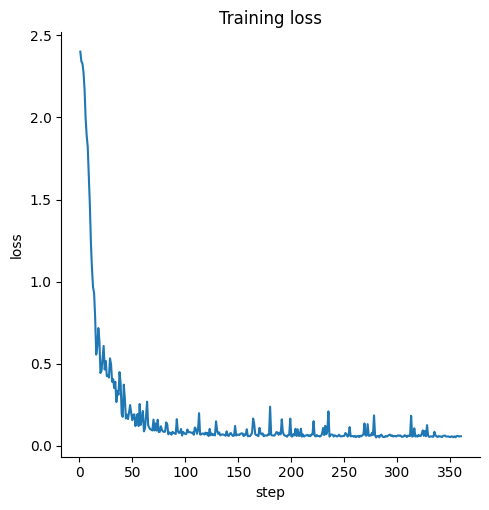

In [13]:
df_loss = pd.DataFrame({
    'step': [int(ln.split('	')[0]) for ln in TRAINING_LOSS.split('\n')],
    'loss': [float(ln.split('	')[1]) for ln in TRAINING_LOSS.split('\n')],
})
sns.relplot(data=df_loss, x='step', y='loss', kind='line')
plt.title('Training loss')
plt.show()

In [14]:
pd.read_csv(sc_csv_name("phi3", False, False))

,prompt_id,text,text_labels,response,text_JOB_value,text_ADJ_value,text_JOB_label,text_ADJ_label
0,zsl#0,"tnservice srl, agenzia per il lavoro (aut. min...",INCLUSIVO,INCLUSIVO,NaN,NaN,NaN,NaN
1,zsl#0,per nostro cliente specializzato nel settore t...,TODO,INCLUSIVO,giornaista,NaN,neutro,NaN
2,zsl#0,per nostro cliente specializzato nel settore t...,TODO,"INCLUSIVO\n\n\nLa frase ""per nostro cliente s...",autista,NaN,neutro,NaN
3,zsl#0,per nostro cliente specializzato nel settore t...,TODO,INCLUSIVO,dentista,NaN,neutro,NaN
4,zsl#0,per nostro cliente specializzato nel settore t...,TODO,INCLUSIVO,ginnasta,NaN,neutro,NaN
...,...,...,...,...,...,...,...,...
10419,fsl#0,Il profilo ideale è addetta che: \nHa consegui...,TODO,INCLUSIVO,addetta,NaN,femminile,NaN
10420,fsl#0,Il profilo ideale è addett* che: \nHa consegui...,TODO,INCLUSIVO,addett*,NaN,neutro,NaN
10421,fsl#0,Il profilo ideale è addetto/a che: \nHa conseg...,TODO,INCLUSIVO,addetto/a,NaN,neutro,NaN
10422,fsl#0,Il profilo ideale è consultant che: \nHa conse...,TODO,INCLUSIVO,consultant,NaN,neutro,NaN


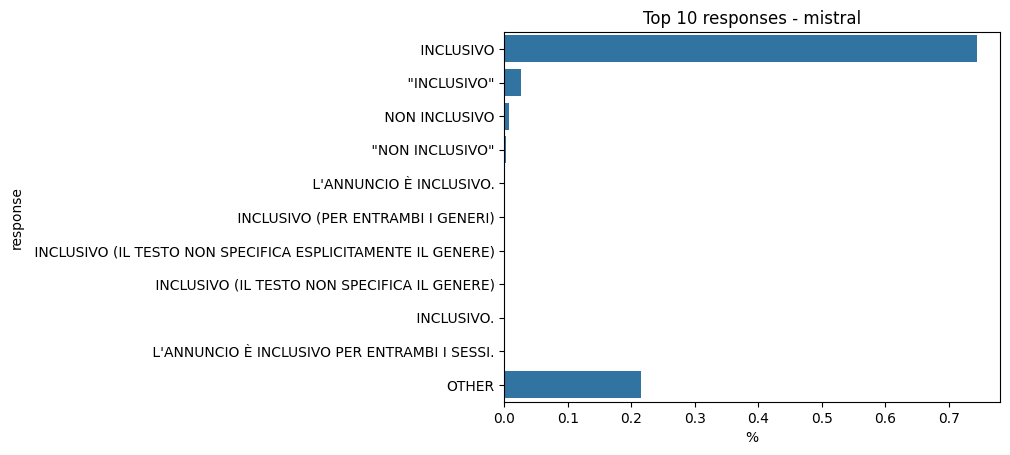

Fixed 0.03, 283 rows


['INCLUSIVO', 'NON INCLUSIVO']

In [15]:
df = pd.read_csv(sc_csv_name("mistral", False, False))
df = fix_df(df)
df = fix_df_model_response(df, 'mistral')
df['response'].unique().tolist()

phi3-finetuned


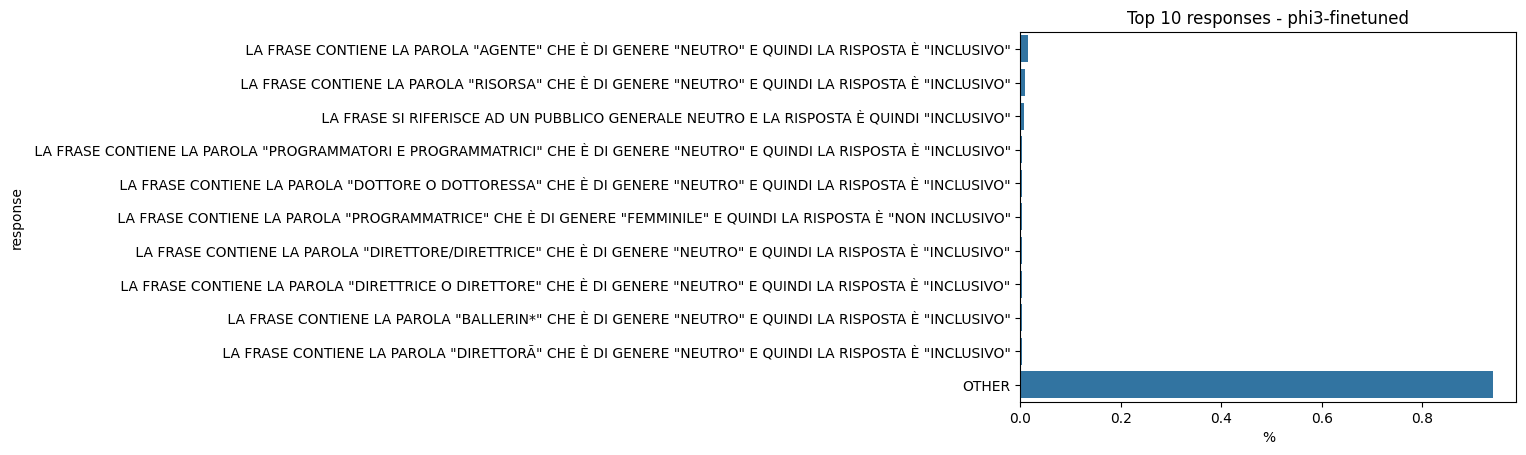

Fixed 0.0, 0 rows
gpt-4o-mini


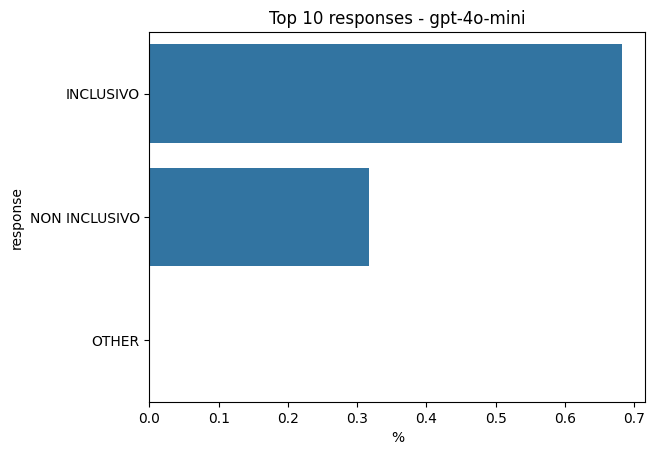

Fixed 0.0, 0 rows
phi3


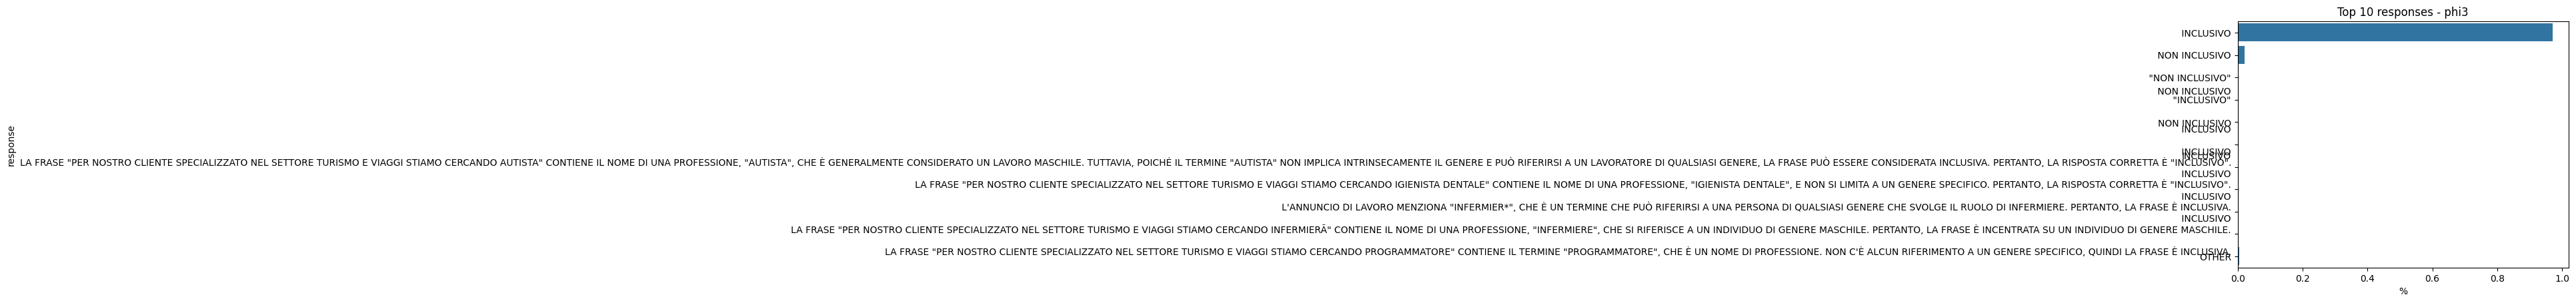

Fixed 0.0, 0 rows
llama3


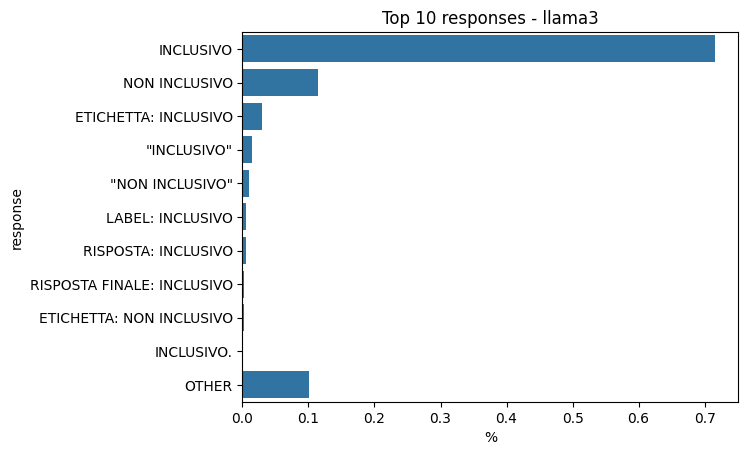

Fixed 0.0, 1 rows
mistral


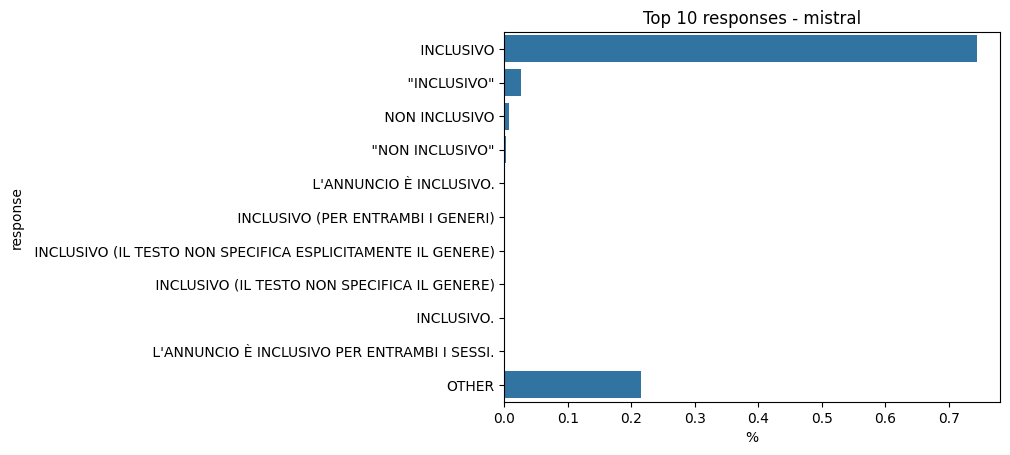

Fixed 0.03, 283 rows
gemma2


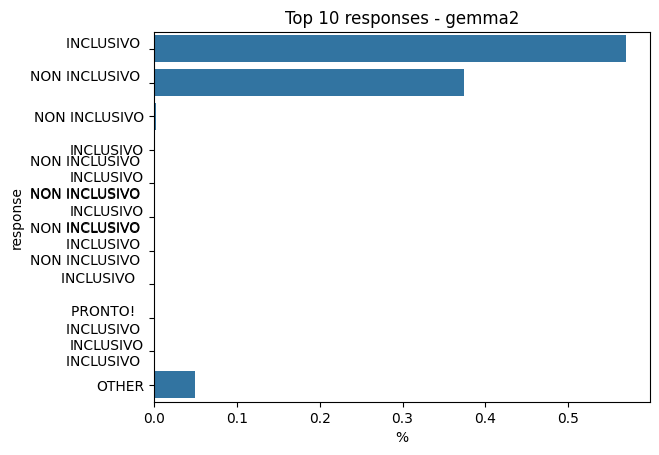

Fixed 0.0, 9 rows
qwen2


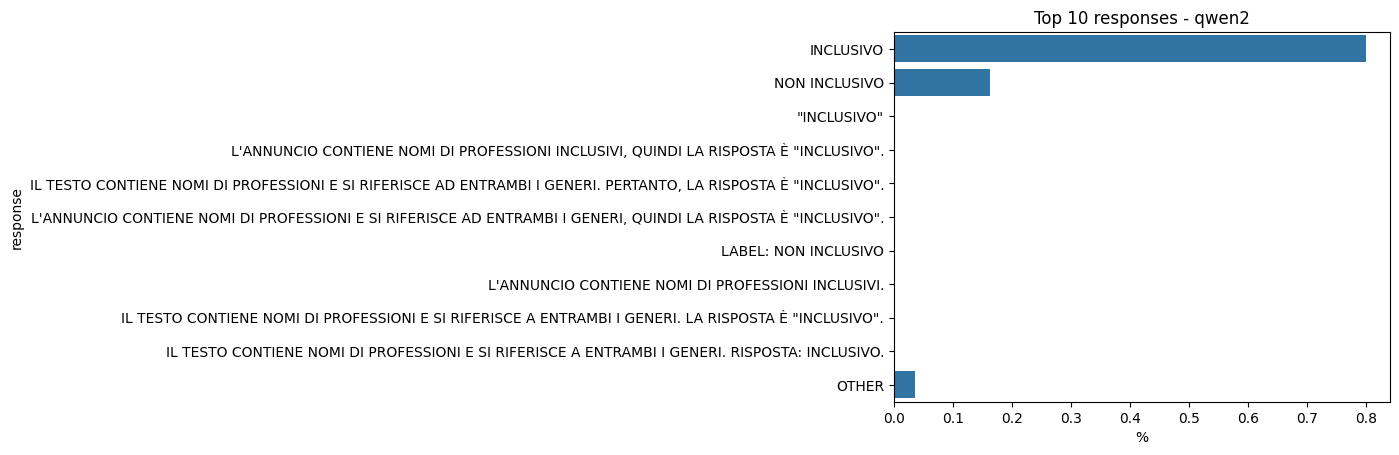

Fixed 0.0, 22 rows


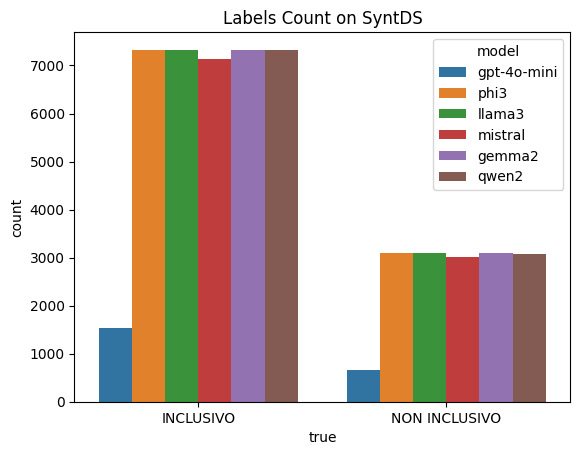

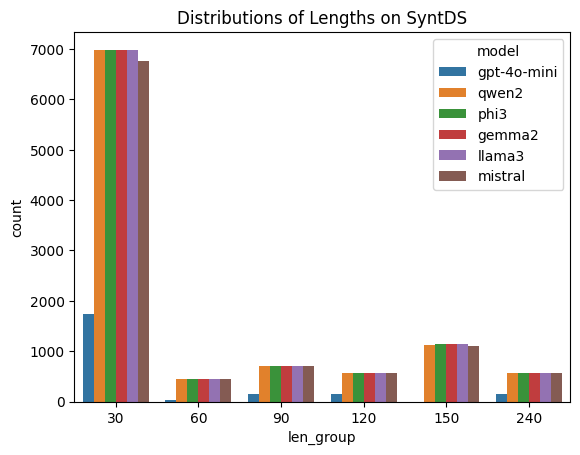

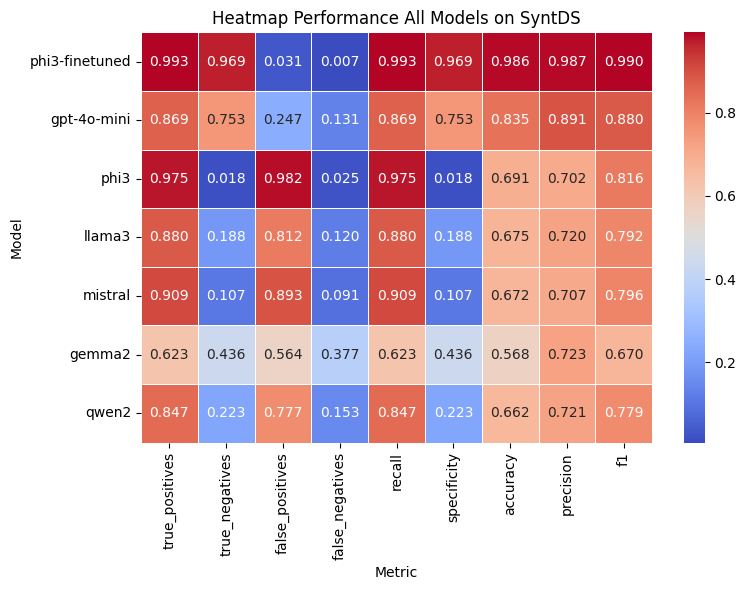

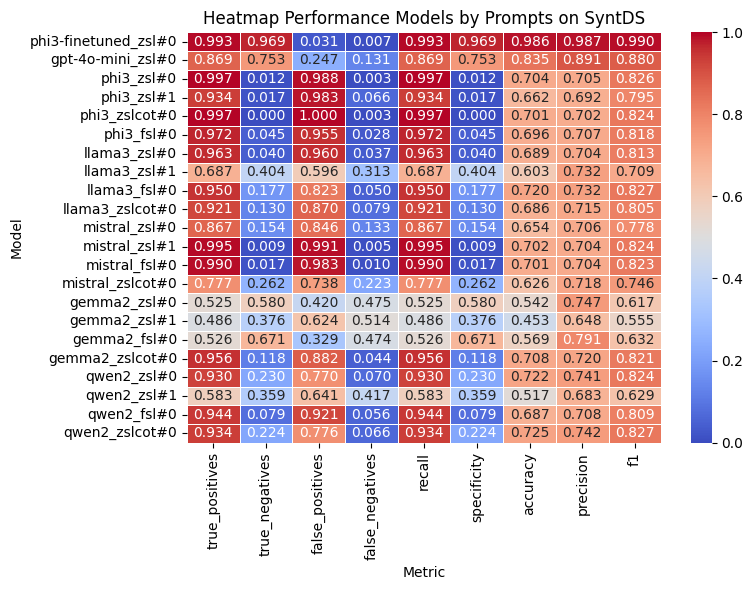

           name    prompt  precision  accuracy        f1    recall  \
1   gpt-4o-mini     zsl#0   0.891406  0.834545  0.880263  0.869396   
2          phi3     zsl#0   0.704747  0.704144  0.825684  0.996725   
3          phi3     zsl#1   0.692152  0.661550  0.795074  0.933952   
4          phi3  zslcot#0   0.702422  0.701074  0.824273  0.997271   
5          phi3     fsl#0   0.706630  0.696470  0.818203  0.971616   
6        llama3     zsl#0   0.703748  0.689179  0.813364  0.963428   
7        llama3     zsl#1   0.731821  0.602840  0.708533  0.686681   
8        llama3     fsl#0   0.732015  0.720261  0.826800  0.949782   
9        llama3  zslcot#0   0.714831  0.686372  0.805058  0.921354   
10      mistral     zsl#0   0.706188  0.653659  0.778240  0.866667   
11      mistral     zsl#1   0.703747  0.702111  0.824434  0.995085   
12      mistral     fsl#0   0.704351  0.700691  0.822969  0.989629   
13      mistral  zslcot#0   0.717610  0.626316  0.746219  0.777205   
14       gemma2     

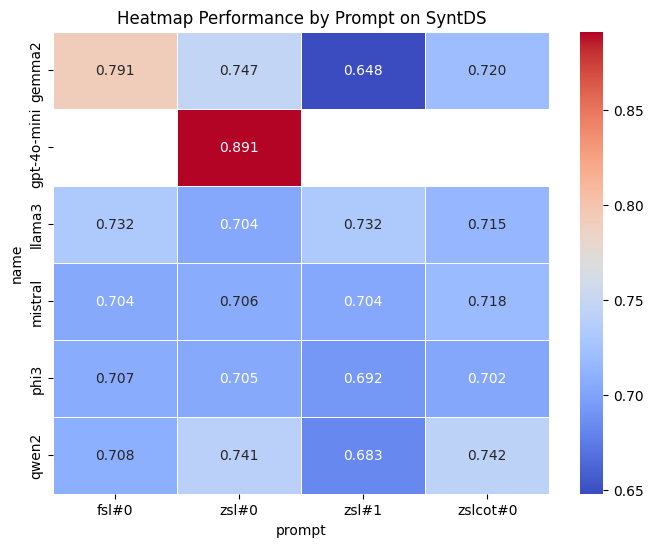

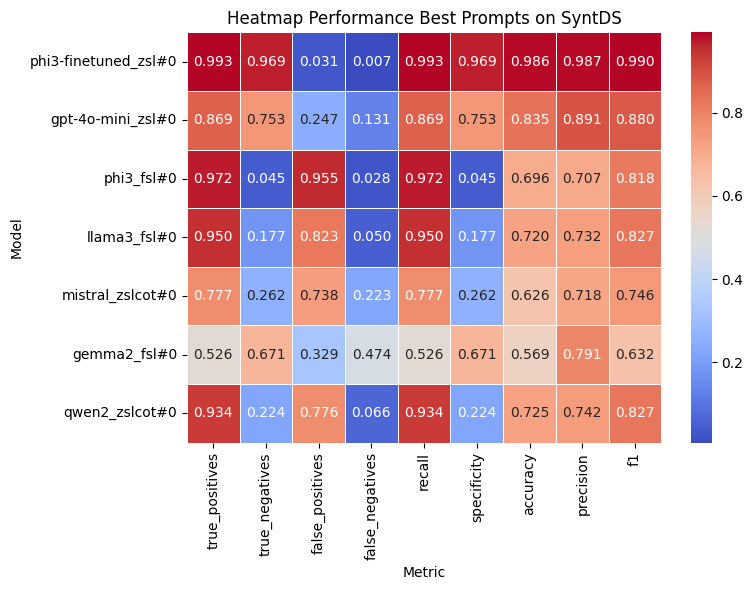

/Users/tommasoromano/Documents/websites/unimi-language-detection/analysis_utils.py:238: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])


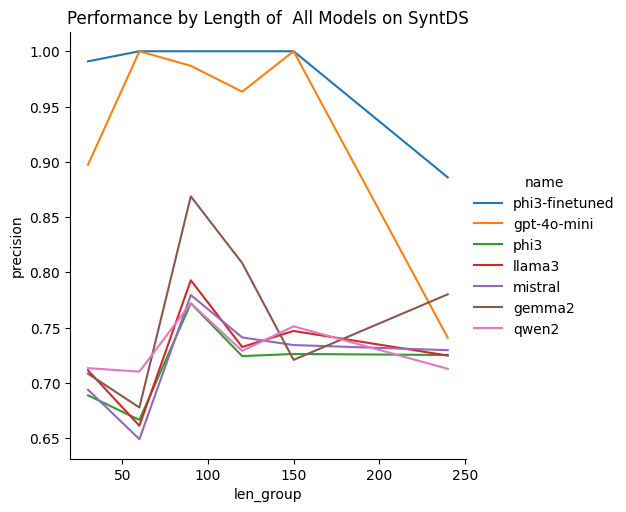

/Users/tommasoromano/Documents/websites/unimi-language-detection/analysis_utils.py:238: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])


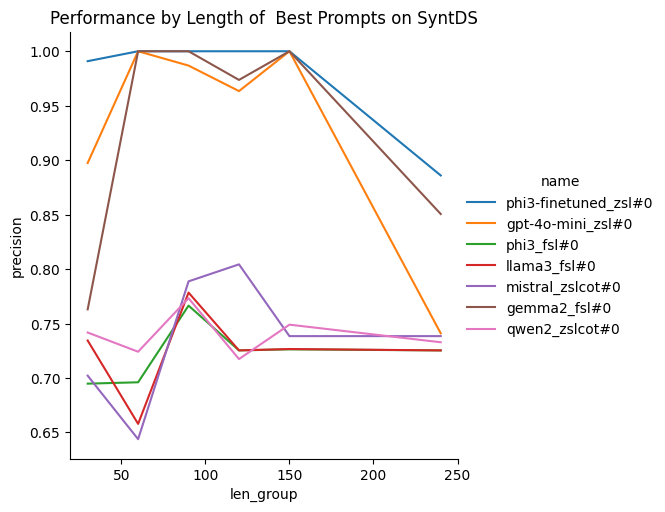

/Users/tommasoromano/Documents/websites/unimi-language-detection/analysis_utils.py:238: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame(_metrics, index=[0])])


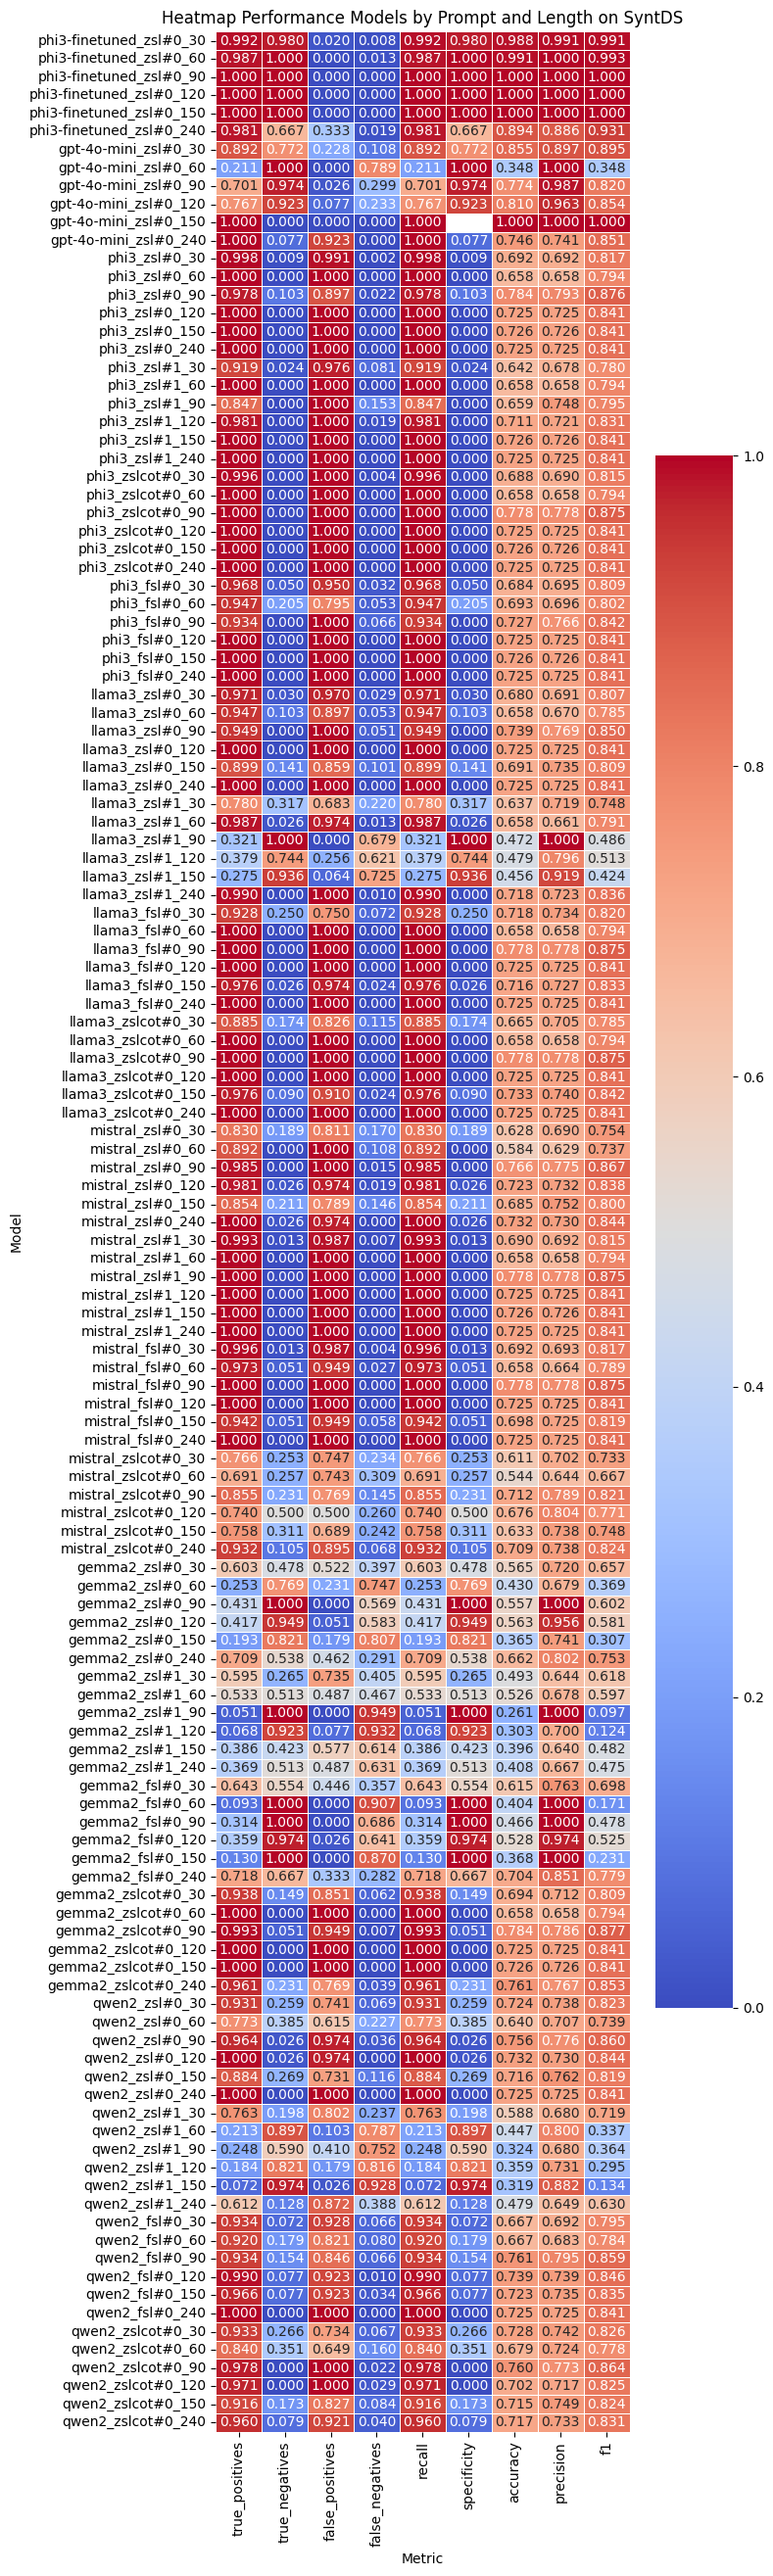

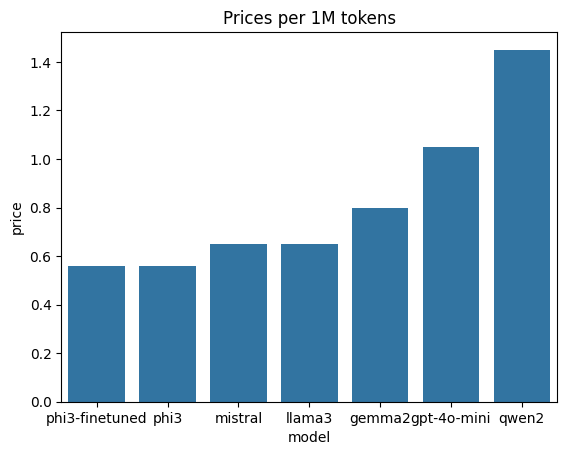

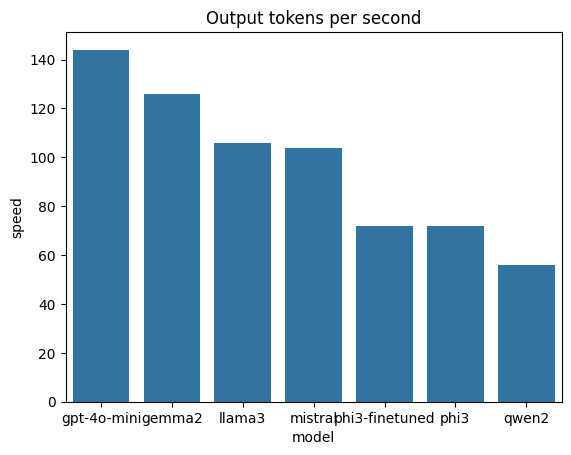

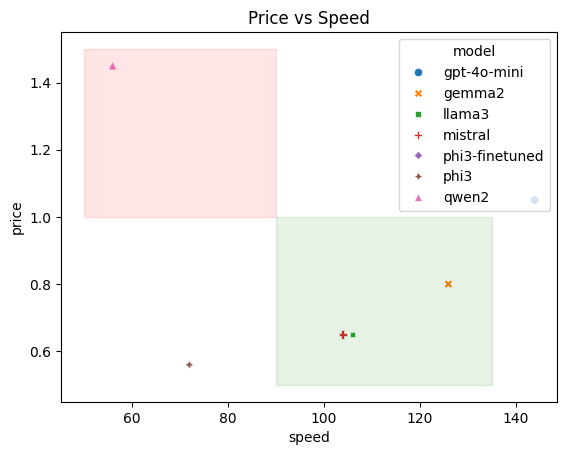

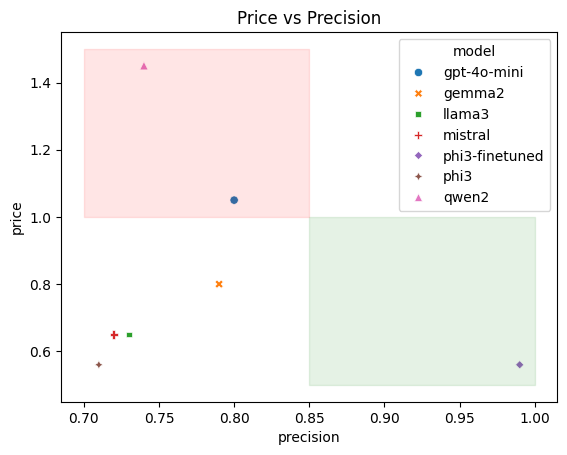

AssertionError: 

In [16]:
IS_SEED = False
ds_text = " on SyntDS" if not IS_SEED else " on RealDS"

dfs_all ,dfs_by_len ,dfs_by_prompt ,dfs_by_pl = make_all_dfs(is_seed=IS_SEED)

df_all = merge_dfs(dfs_all)
df_all_not_finetuned = merge_dfs([x for x in dfs_all if 'finetuned' not in x[1]])
# df_by_len = merge_dfs(dfs_by_len)
# df_by_prompt = merge_dfs(dfs_by_prompt)

plot_labels_by_model(df_all_not_finetuned, title=ds_text)
plot_len_groups(df_all_not_finetuned, title=ds_text)

heatmap_of_performance(dfs_all, title=" All Models" + ds_text)
heatmap_of_performance(dfs_by_prompt, title=" Models by Prompts" + ds_text)
plot_prompts(dfs_by_prompt, title=ds_text)
heatmap_of_prompts(dfs_by_prompt, title=ds_text)
best_prompts = get_best_prompt(dfs_by_prompt)
dfs_best_all = [(df,nm) for df,nm in dfs_by_prompt if best_prompts[nm.split('_')[0]][0] in nm]
dfs_best_by_len = [(df,nm) for df,nm in dfs_by_pl if best_prompts[nm.split('_')[0]][0] in nm]
heatmap_of_performance(dfs_best_all, title=" Best Prompts" + ds_text)
# heatmap_of_performance(dfs_by_len, title="Models by Length" + ds_text)
plot_len_metrics(dfs_by_len, "precision", 1, title=" All Models" + ds_text)
# heatmap_of_performance(dfs_best_by_len, title="Best Prompts by Length" + ds_text)
plot_len_metrics(dfs_best_by_len, "precision", 2, title=" Best Prompts" + ds_text)
heatmap_of_performance(dfs_by_pl, title=" Models by Prompt and Length" + ds_text)
# plot_len_metrics(dfs_by_pl, "precision", 2, title="Models by Prompt and Length" + ds_text)

plot_general_costs()

assert 1 == 2

In [ ]:
assert 1 == 2

AssertionError: 